In [124]:
from IPython.display import HTML
HTML(
    "<style>\
    span.str {color:#BA2121; font-style:italic; font-weight:bold;}\
    span.num {color:#080; font-style:italic; font-weight:bold;}\
    span.bltn {color:#080; font-weight:bold;}\
    span.op {color:#AA22FF;}\
    span.func {color:#00F;}\
    h3.yt {color:#009900; font-style:italic;}\
    span.yt {color:#009900; font-style:italic;}</style>"
)


In [125]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [126]:
covid_data = pd.read_csv("Data/Covid Data.csv")
covid_data.head(5)

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [127]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

Despite there being over 1,000,000 deaths recorded, we can see that only 33,656 (or about 3.2%) of them died while being connected to the ventilator

In [128]:
print(covid_data.columns.values)

['USMER' 'MEDICAL_UNIT' 'SEX' 'PATIENT_TYPE' 'DATE_DIED' 'INTUBED'
 'PNEUMONIA' 'AGE' 'PREGNANT' 'DIABETES' 'COPD' 'ASTHMA' 'INMSUPR'
 'HIPERTENSION' 'OTHER_DISEASE' 'CARDIOVASCULAR' 'OBESITY' 'RENAL_CHRONIC'
 'TOBACCO' 'CLASIFFICATION_FINAL' 'ICU']


In [129]:
covid_data['SEX'] = np.where((covid_data.SEX == 1), "Female", covid_data.SEX)
covid_data['SEX'] = np.where((covid_data.SEX == '2'), "Male", covid_data.SEX)
covid_data['PATIENT_TYPE'] = np.where((covid_data.PATIENT_TYPE == 1), "Sent Home", covid_data.PATIENT_TYPE)
covid_data['PATIENT_TYPE'] = np.where((covid_data.PATIENT_TYPE == '2'), "Hospitalized", covid_data.PATIENT_TYPE)
covid_data['PNEUMONIA'] = np.where((covid_data.PNEUMONIA == 1), "Yes", covid_data.PNEUMONIA)
covid_data['PNEUMONIA'] = np.where((covid_data.PNEUMONIA == '2'), "No", covid_data.PNEUMONIA)
covid_data = covid_data[covid_data['DATE_DIED'] != '9999-99-99']
covid_data

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,Female,Sent Home,03/05/2020,97,Yes,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,Male,Sent Home,03/06/2020,97,Yes,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,Male,Hospitalized,09/06/2020,1,No,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,Female,Sent Home,12/06/2020,97,No,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,Male,Sent Home,21/06/2020,97,No,68,97,1,...,2,2,1,2,2,2,2,2,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047635,1,13,Male,Hospitalized,18/07/2020,1,Yes,73,97,2,...,2,2,1,2,2,1,2,2,3,2
1047636,1,13,Male,Sent Home,26/07/2020,97,Yes,82,97,2,...,2,2,1,2,2,2,2,2,3,97
1047637,1,13,Female,Sent Home,27/07/2020,97,Yes,82,2,2,...,2,2,2,2,2,2,2,2,3,97
1047638,1,13,Male,Hospitalized,29/07/2020,1,Yes,80,97,2,...,2,2,2,2,2,1,2,2,3,2


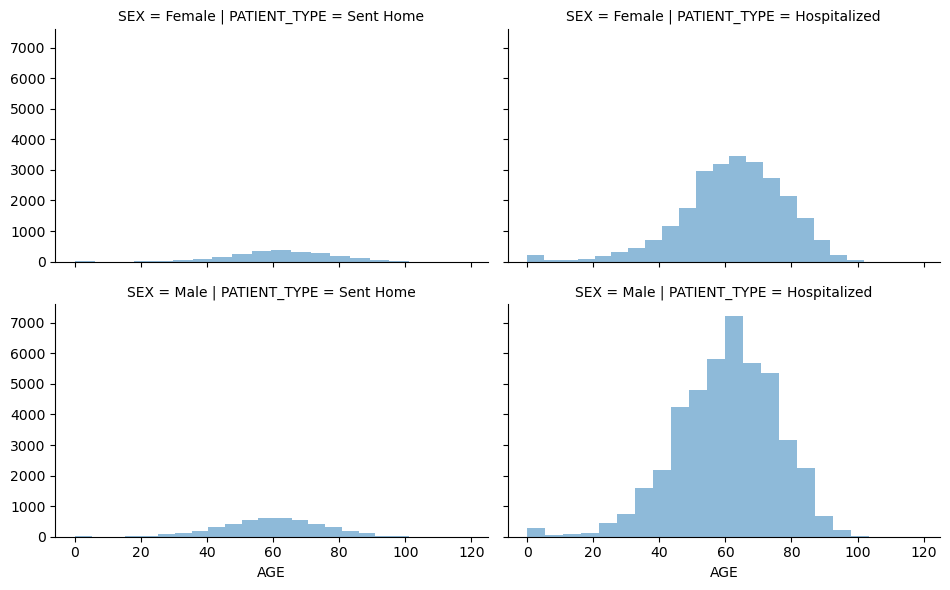

In [130]:
grid_1 = sns.FacetGrid(covid_data, col='PATIENT_TYPE', row='SEX', aspect=1.6)
grid_1.map(plt.hist, 'AGE', alpha=.5, bins = 20)

Looking at this data, we can see that those who were hospitalized with COVID-19 had significantly more deaths than those who were sent home. We can also see that hospitalized persons who were between 50 and 70 years old made up the most deaths.

In [131]:
X_train = covid_data.drop("AGE", axis=1)
Y_train = covid_data["AGE"]

In [134]:
logreg = LogisticRegression()
logreg.fit(covid_data["AGE"], covid_data["ASTHMA"])
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

ValueError: Expected 2D array, got 1D array instead:
array=[65. 72. 55. ... 82. 80. 61.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.